## Fit Reid Ideal parameters from DIPPR107

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Complete this (parameters of the DIPPR107 equation)
a, b, c, d, e = (1.3220e05, 4.8170e05, 1.6853e03, 3.5892e05, 7.6180e02)

# Values for testing
temp_min = 300
temp_max = 1500

value_min = 1.8995e05
value_max = 5.2596e05

# Where to perform the polyfit
temperature_range = np.array([298.15, 473.15])

In [4]:
def dippr_107(temperature):
    cp = (
        a
        + b * (c / temperature / np.sinh(c / temperature)) ** 2
        + d * (e / temperature / np.cosh(e / temperature)) ** 2
    )
    return cp

In [5]:
# Testing
eval_min = dippr_107(temp_min)
eval_max = dippr_107(temp_max)

assert np.allclose(value_min, eval_min, atol=1e-4, rtol=0.01)
assert np.allclose(value_max, eval_max, atol=1e-4, rtol=0.01)

print(eval_min, eval_max)
print(value_min, value_max)

189949.15303561333 525961.0081516725
189950.0 525960.0


Parametros diisopropyl ether dippr100 J/kmol/K:
- A_cp_reid = 59731.821508954345
- B_cp_reid = 99.19028282132928
- C_cp_reid = 1.6333719770940363
- D_cp_reid = -0.0017279808979076222

Parametros diisopropyl ether ReidIdeal Julia J/mol/K:
- A_cp_reid = 59.73182150895435
- B_cp_reid = 0.09919028282132927
- C_cp_reid = 0.0016333719770940363
- D_cp_reid = -1.7279808979076221e-06



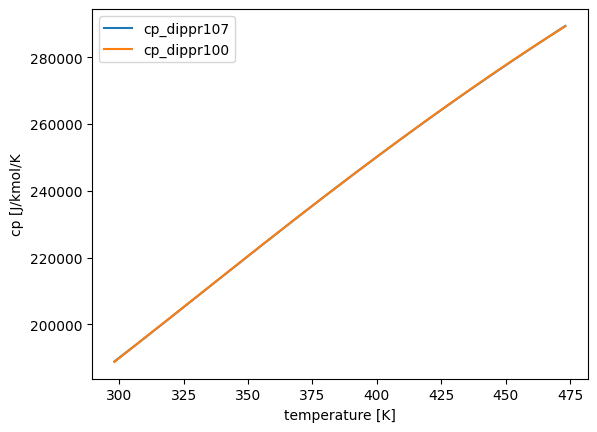

In [9]:
temperatures = np.linspace(temperature_range[0], temperature_range[1], 500)

# Evaluamos
cp_dippr107 = dippr_107(temperatures)

# Polinomio
param_DIPPR100 = np.polyfit(temperatures, cp_dippr107, 3)

# Testeamos
cp_dippr100 = np.polyval(param_DIPPR100, temperatures)

assert np.allclose(cp_dippr107, cp_dippr100, atol=1e-6, rtol=0.001)

# Grafiquito
plt.plot(temperatures, cp_dippr107)
plt.plot(temperatures, cp_dippr100)

plt.legend(["cp_dippr107", "cp_dippr100"])
plt.xlabel("temperature [K]")
plt.ylabel("cp [J/kmol/K")

# Printeo parametros en las unidades de la DIPPR (estos calculan en J/kmol/K)
print(
    "Parametros diisopropyl ether dippr100 J/kmol/K:\n"
    f"- A_cp_reid = {param_DIPPR100[3]}\n"
    f"- B_cp_reid = {param_DIPPR100[2]}\n"
    f"- C_cp_reid = {param_DIPPR100[1]}\n"
    f"- D_cp_reid = {param_DIPPR100[0]}\n"
)

# Valores en unidades correctas par ala Clapeyron (J/mol/K)
print(
    "Parametros diisopropyl ether ReidIdeal Julia J/mol/K:\n"
    f"- A_cp_reid = {param_DIPPR100[3] / 1000}\n"
    f"- B_cp_reid = {param_DIPPR100[2] / 1000}\n"
    f"- C_cp_reid = {param_DIPPR100[1] / 1000}\n"
    f"- D_cp_reid = {param_DIPPR100[0] / 1000}\n"
)